In [3]:
!pip install opencv-contrib-python
!pip install mtcnn
!pip install cv

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [4]:
import numpy as np
import pandas as pd 
import cv2
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
import os
import time
from google.colab.patches import cv2_imshow

In [5]:
os.listdir("/content/drive/MyDrive/Video") 

['Tuấn.mp4',
 'Trường.mp4',
 'Linh.mp4',
 'Hiếu.mp4',
 'Quân.mp4',
 'Xuân Anh.mp4',
 'Tân.mp4',
 'Đức.mp4',
 'Kiên.mp4',
 'Việt Đức.mp4',
 'Hùng.mp4',
 'Thắng.mp4',
 'Vân.mp4',
 'HĐức.mp4']

In [6]:
from glob import glob

def create_dir(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print(f"ERROR: creating directory with name {path}")

def save_frame(video_path, save_dir, gap=10):
    name = video_path.split("/")[-1].split(".")[0]
    #name = unidecode.unidecode(name)
    save_path = os.path.join(save_dir, name)
    create_dir(save_path)

    cap = cv2.VideoCapture(video_path)
    idx = 0

    while True:
        ret, frame = cap.read()

        if ret == False:
            cap.release()
            break

        if idx == 0:
            cv2.imwrite(f"{save_path}/{idx}.jpg", frame)
        else:
            if idx % gap == 0:
                cv2.imwrite(f"{save_path}/{idx}.jpg", frame)

        idx += 1

if __name__ == "__main__":
    video_paths = glob("videos/*")
    save_dir = "save"

    for path in video_paths:
        save_frame(path, save_dir, gap=10)

In [7]:
files_dir = []
for root, directory, file in os.walk("/content/drive/MyDrive/Video"):
    for f in file:
        f_ = os.path.join(root, f)
        files_dir.append(f_)
print(files_dir)
for file in files_dir:
    f = file.split("/")
    print(f[-1].split(".")[0])

['/content/drive/MyDrive/Video/Tuấn.mp4', '/content/drive/MyDrive/Video/Trường.mp4', '/content/drive/MyDrive/Video/Linh.mp4', '/content/drive/MyDrive/Video/Hiếu.mp4', '/content/drive/MyDrive/Video/Quân.mp4', '/content/drive/MyDrive/Video/Xuân Anh.mp4', '/content/drive/MyDrive/Video/Tân.mp4', '/content/drive/MyDrive/Video/Đức.mp4', '/content/drive/MyDrive/Video/Kiên.mp4', '/content/drive/MyDrive/Video/Việt Đức.mp4', '/content/drive/MyDrive/Video/Hùng.mp4', '/content/drive/MyDrive/Video/Thắng.mp4', '/content/drive/MyDrive/Video/Vân.mp4', '/content/drive/MyDrive/Video/HĐức.mp4']
Tuấn
Trường
Linh
Hiếu
Quân
Xuân Anh
Tân
Đức
Kiên
Việt Đức
Hùng
Thắng
Vân
HĐức


In [8]:
train = "/content/drive/MyDrive/Train"
for file in files_dir:
    input_loc = file
    save_frame(input_loc, train, 4)

val = "/content/drive/MyDrive/Val"
for file in files_dir:
    input_loc = file
    save_frame(input_loc, val, 10)

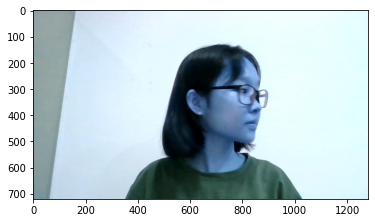

(720, 1280, 3)


In [9]:
img = cv2.imread('/content/drive/MyDrive/Train/Vân/104.jpg')
plt.imshow(img)
plt.show()
print(img.shape)

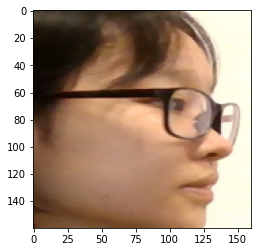

(160, 160, 3)


In [10]:
# Detech mặt = MTCNN

def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    # Tạo 1 detector từ class MTCNN. Hàm detect_faces để phát hiện các khuôn mặt trong bức hình
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    # Kết cả results trả về bao gồm 1 list các bouding boxes trong đó có tọa độ 2 mắt, mũi, miệng. Và kèm theo cả độ tin tưởng của các bounding boxes này nữa
    # nếu ko detech được thì trả về None
    if results == []:
      return None
    # cắt mặt ra từ ảnh detech
    x1, y1, width, height = results[0]['box']

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]
    # resize ảnh về kích thước 160*160
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load thử 1 ảnh và trích xuất ra mặt
pixels = extract_face('/content/drive/MyDrive/Train/Vân/108.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [11]:
# Hàm cắt mặt từ dataset
def load_face(dir):
    faces = []
    
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        if face is None:
          continue

        faces.append(face)
    return faces

def load_dataset(dir):
    # X: faces, y: labels
    X, y = [], []
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)

In [14]:
# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/Train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/Val/')
print(testX.shape, testy.shape)

loaded 125 sample for class: Tuấn
loaded 103 sample for class: Trường
loaded 89 sample for class: Linh
loaded 130 sample for class: Hiếu
loaded 224 sample for class: Quân
loaded 208 sample for class: Xuân Anh
loaded 82 sample for class: Tân
loaded 144 sample for class: Đức
loaded 116 sample for class: Kiên
loaded 145 sample for class: Việt Đức
loaded 170 sample for class: Hùng
loaded 81 sample for class: Thắng
loaded 111 sample for class: Vân
loaded 49 sample for class: HĐức
(1777, 160, 160, 3) (1777,)
loaded 49 sample for class: Tuấn
loaded 42 sample for class: Trường
loaded 36 sample for class: Linh
loaded 52 sample for class: Hiếu
loaded 90 sample for class: Quân
loaded 84 sample for class: Xuân Anh
loaded 33 sample for class: Tân
loaded 58 sample for class: Đức
loaded 47 sample for class: Kiên
loaded 58 sample for class: Việt Đức
loaded 68 sample for class: Hùng
loaded 32 sample for class: Thắng
loaded 45 sample for class: Vân
loaded 20 s

In [15]:
# lưu dataset
np.savez_compressed('/content/drive/My Drive/dataset_cw2.npz', trainX, trainy, testX, testy)

In [16]:
# load the face dataset
data = np.load('/content/drive/My Drive/dataset_cw2.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (1777, 160, 160, 3) (1777,) (714, 160, 160, 3) (714,)


In [24]:
# embedding
def get_embedding(model_f, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

# load the facenet model
model = load_model('/content/drive/MyDrive/facenet_keras.h5')
    
# convert mỗi ảnh trong tập train set thành embedding
emdTrainX = []
for face in trainX:
    emd = get_embedding(model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert mỗi ảnh trong tập test set thành embedding
emdTestX = []
for face in testX:
    emd = get_embedding(model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# lưu lại embedding vector
np.savez_compressed('dataset_cw2_embeddings.npz', emdTrainX, trainy, emdTestX, testy)

(1777, 128)
(714, 128)


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=1777, test=714
Accuracy: train=99.887, test=99.860


Predicted: 
['Hiếu' 'Hùng' 'HĐức' 'Kiên' 'Linh' 'Quân' 'Tân' 'Thắng'
 'Trường' 'Tuấn' 'Vân' 'Việt Đức' 'Xuân Anh' 'Đức'] 
[1.94887164e-01 2.00660147e-01 7.78194381e-02 3.82763523e-01
 6.12324304e-02 9.75606964e+01 6.17554499e-01 1.10441541e-01
 2.50621413e-01 1.70309185e-01 5.11669795e-02 1.17314787e-01
 1.20000894e-01 8.45316120e-02]
Expected: Quân


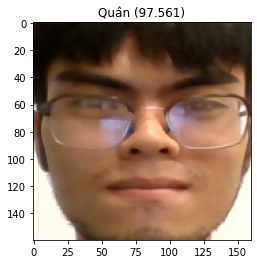

In [26]:
#Chọn ngẫu nhiên từ tập test set để test và xem độ chính xác
from random import choice
# select face ngẫu nhiên từ test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

In [28]:
import pickle
# Save model
pkl_filename = "/content/drive/My Drive/TP_cw2.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
 
print("Saved model")

Saved model
